# Open Data Project - by Trisha Ho

## Looking into Australia's Health Survey
Looking into the data documentations of Australian Bureau of Statistics and how they conducted a public survey to discover new and present patterns, trends, concerns and so much more in relations to an individual's health living in Australia. From this I was able to delve deeper into the data documentation given and manipulate them to show data visualisations.

Why was it collected? The dataset was constructed (2011-12) through conducting a public survey where doctors, nutritionist and more can discover the daily intakes and behaviours of the health of Australians. This allowed them to discover health issues impacted from eating and active decisions. "For the purposes of these surveys, a household was defined as one or more persons"

Data: Australian Health Survey Publication Type of dataset: Categorical data

Resources: https://www.abs.gov.au/websitedbs/d3310114.nsf/home/australian+health+survey

What I'll be looking at:

- Proportion of people with usual daily intake less than recommended number of serves
- Usual serves per day of all food groups
- Summary activity indicators by age and gender
- Goal: To find trends and patterns of Australian's health and how they manage it. What can be fixed?

Goal:
- To make data easier to access and visualise since this was a hard dataset to manipulate. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
saved_style_state = matplotlib.rcParams.copy() 

## Loading the Excel files onto my notebook
Firstly, I downloaded a collection of Excel files from the Australian Bureau of Statistics websites for me to later analyse and manipulate. They are all divided into 4 topics: daily intake, servings from the food group, water consumption and physical activities.

In [4]:
#Overall consumption
Consumption = pd.read_excel("abs_consumption.xls", sheet_name='Table 1.1', skiprows=4)

#Usual Serves - for males/ do bar charts for these 
UsualServes_Meat = pd.read_excel("usualserves_meat.xlsx")
UsualServes_Vegetables = pd.read_excel("usualserves_vegetables.xlsx")
UsualServes_CannedFruits = pd.read_excel("usualserves_cannedfruits.xlsx")
UsualServes_Fruits = pd.read_excel("usualserves_fruit.xlsx")
UsualServes_Dairy = pd.read_excel("usualserves_dairy.xlsx")
UsualServes_Grains = pd.read_excel("usualserves_grain.xlsx")

#Usual Serves - for females/ do bar charts for these 
F_UsualServes_Vegetables = pd.read_excel("f_usualserves_vegetables.xlsx")
F_UsualServes_Fruit = pd.read_excel("F_Usualserves_Fruit.xlsx")
F_UsualServes_CannedFruit = pd.read_excel("f_usualserves_canned.xlsx")
F_UsualServes_Dairy = pd.read_excel("f_usualserves_dairy.xlsx")
F_UsualServes_Meat = pd.read_excel("f_usualserves_meat.xlsx")
F_UsualServes_Grains = pd.read_excel("f_usualserves_grains.xlsx")

#Water consumption
water = pd.read_excel("abs_consumption.xls", sheet_name='Table 8.1', skiprows=4)

#Physical activity 
Average_PhysicalActivity = pd.read_excel("Table 8 Type of physical activity, Persons aged 18 years and over.xls", sheet_name='Table_8_1', skiprows=5)

#STUFF FOR THE DATA VISUALISATIONS
#Colours: #CEADFE', "#CFBFFE", "#CFD0FE", "#D1E2FF", "#D4F1FF", "#D7FFFF"


In [2]:
#TESTING THE FILES
if os.path.isfile("f_usualserves_dairy.xlsx"):
        print("loading")
        print("done")
else:
    print("Insert file")

loading
done


## 1. Proportion of people with usual daily intake less than recommended number of serves - Males and Females 
- Reconstructed and cleaned up the dataset given by ABS 
- Shifted and removed some values for it to make sense and have a purpose 
- Took into account the columns and rows that needed to be shown

## About the type of dataset: 
- The dataset is relatively small with not as many values, hence it is a summary dataset - more concised 

In [5]:
#DAILY INTAKE - MALES
male_consumption = Consumption.head(31)
newmale_consumption = male_consumption.rename(columns={"Unnamed: 0": "Food", "Age group (years)": "Unit", "Unnamed: 2": "2-18", "Unnamed: 3": "19 years and over", "Unnamed: 4": "Total 2 years and over"})
change_male = newmale_consumption.drop([0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 29, 30], axis=0).head(31)
change_male.at[4, "Food"] = "Vegetables, legumes/beans"
change_male.at[8, "Food"] = "Fruit(d)"
change_male.at[12, "Food"] = "Fresh or canned fruit" 
change_male.at[16, "Food"] = "Milk, yoghurt, cheese and alternatives"
change_male.at[20, "Food"] = "Meats and alternatives"
change_male.at[24, "Food"] = "Grains (cereals)"
change_male.at[28, "Food"] = "Unsaturated spreads and oils"

DailyIntake_Male = change_male
DailyIntake_Male

,Food,Unit,2-18,19 years and over,Total 2 years and over
4,"Vegetables, legumes/beans",'000,2439,7971.6,10410.5
8,Fruit(d),'000,1311.5,5838.4,7150
12,Fresh or canned fruit,'000,1877.7,7354.2,9231.9
16,"Milk, yoghurt, cheese and alternatives",'000,1969.6,7422.7,9392.3
20,Meats and alternatives,'000,2263.1,6533.9,8797
24,Grains (cereals),'000,1480.9,5496.7,6977.6
28,Unsaturated spreads and oils,'000,1418.7,1229.3,2648


In [35]:
DailyIntake_Male.shape

(7, 5)

## Looking at the rows

In [36]:
first_row = DailyIntake_Male.iloc[1]
first_row

Food                      Fruit(d)
Unit                          '000
2-18                        1311.5
19 years and over           5838.4
Total 2 years and over        7150
Name: 8, dtype: object

## About DailyIntake_Male and DailyIntake_Female
 The whole dataset is based on the *proportion of males with usual daily intake less than recommended number of servings of food*. (Overall)  

- Food: The food group 
- Column Values (2-18, 19 years and over): Each column represents the age group being recorded and the values below that show how many individuals consumer less than recommended the number of servings

In [36]:
#DAILY INTAKE - FEMALES
female_consumption = Consumption.head(62)
newmale_consumption = female_consumption.rename(columns={"Unnamed: 0": "Food", "Age group (years)": "Unit", "Unnamed: 2": "2-18", "Unnamed: 3": "19 years and over", "Unnamed: 4": "Total 2 years and over"})
change_females = females.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 57, 58, 60, 61], axis=0).head(62)
change_females.at[35, "Food"] = "Vegetables, legumes/beans"
change_females.at[39, "Food"] = "Fruit(d)"
change_females.at[43, "Food"] = "Fresh or canned fruit" 
change_females.at[47, "Food"] = "Milk, yoghurt, cheese and alternatives"
change_females.at[51, "Food"] = "Meats and alternatives"
change_females.at[55, "Food"] = "Grains (cereals)"
change_females.at[59, "Food"] = "Unsaturated spreads and oils"

DailyIntake_Female = change_females
DailyIntake_Female

,Food,Unit,2-18,19 years and over,Total 2 years and over
35,"Vegetables, legumes/beans",'000,2313.9,7656.9,9970.8
39,Fruit(d),'000,1254.2,6221.8,7476
43,Fresh or canned fruit,'000,1818.4,7434.3,9252.6
47,"Milk, yoghurt, cheese and alternatives",'000,1853.6,7793.6,9647.1
51,Meats and alternatives,'000,2292.6,7031.3,9323.9
55,Grains (cereals),'000,1710.4,6109.2,7819.6
59,Unsaturated spreads and oils,'000,1079.9,3361.9,4441.8


Created a .tolist() to make life easier... I put these values - Food_List inside a variable for the population pyramid graph. 

In [62]:
#Acessing the "Food" list for the population pyramid 
Food_List = DailyIntake_Female["Food"].tolist()
Food_List

['Vegetables, legumes/beans',
 'Fruit(d)',
 'Fresh or canned fruit',
 'Milk, yoghurt, cheese and alternatives',
 'Meats and alternatives',
 'Grains (cereals)',
 'Unsaturated spreads and oils']

## Looking at the relationships between the daily intakes between males and females 
- After compiling all of the data needed, I put it all onto a Population Pyramid Graph
- Using seaborns bar plot to create population pyramid graph

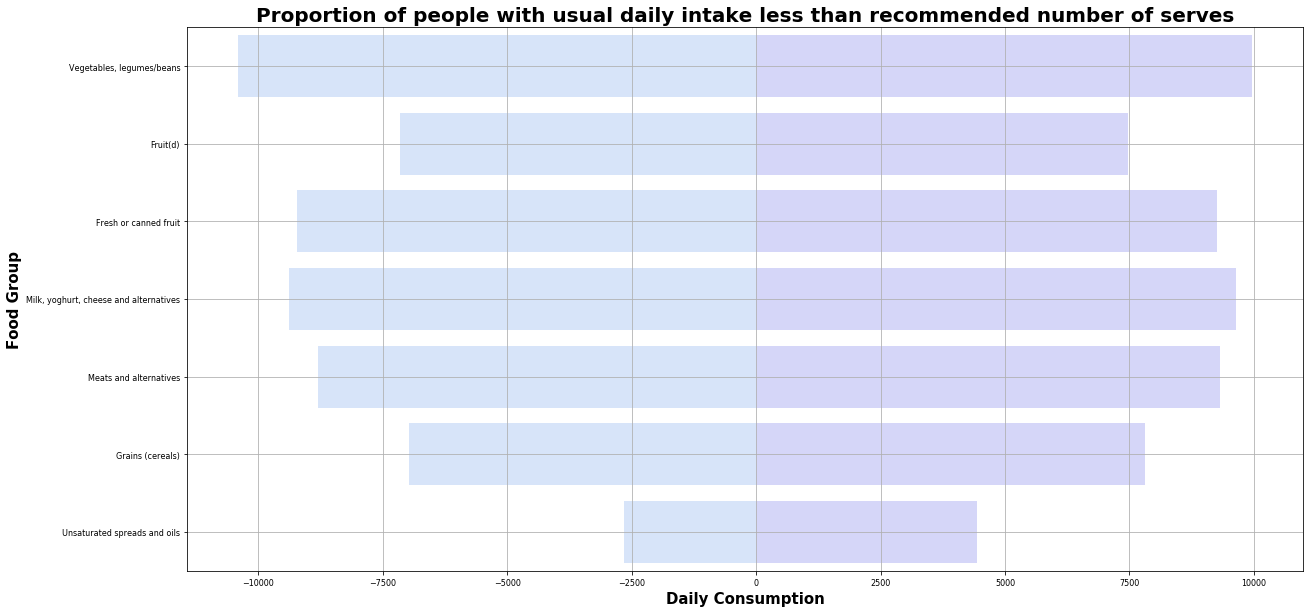

In [118]:
population_graph = pd.DataFrame({'Food': Food_List, 
                    'Male': [-10410.5, -7150, -9231.9, -9392.3, -8797, -6977.6, -2647.999999999999], 
                    'Female': [9970.8, 7476, 9252.6, 9647.1, 9323.9, 7819.6, 4441.800000000001]})

Foods = Food_List
bar_plot = sns.barplot(x='Male', y='Food', data=population_graph, order=Foods, color='#D1E2FF')
bar_plot = sns.barplot(x='Female', y='Food', data=population_graph, order=Foods, color='#CFD0FE') 
plt.xlabel("Daily Consumption", fontsize=15, weight="bold")
plt.ylabel("Food Group", fontsize=15, weight="bold")
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
plt.title('Proportion of people with usual daily intake less than recommended number of serves', fontsize=20, weight="bold")
plt.grid(True)

# Some discoveries.. 
## Legend = Blues - Males and Purples - Females

- *Take note: That women and males both have different eating habits.."*
- Looking into the servings 

## Going into more depth with the serving sizes....
After looking at a overall view of the daily intakes of Australians based on gender, I looked in further into the servings Australians take - in relations of age groups


## Male Servings 

In [38]:
Fruits = UsualServes_Fruits.head(11)
M_FruitServings = Fruits.drop(columns={"Total 2 years and over", "2-3", "4-8", "9-11", "12-13", "14-18", "19-50", "51-70", "71 years and over"})
M_FruitServings

,Serves,2-18,19 years and over
0,<0.5,12.2,20.4
1,0.5<1.0,17.0,19.4
2,1.0<1.5,19.0,17.1
3,1.5<2.0,17.6,13.8
4,2.0<2.5,13.4,10.4
5,2.5<3.0,8.9,7.2
6,3.0<3.5,5.2,4.7
7,3.5<4.0,3.1,2.9
8,4.0<4.5,1.7,1.8
9,4.5<5.0,0.9,1.0


In [46]:
male_mid_mean = M_FruitServings["2-18"].mean()
male_mid_mean

9.100000000000001

In [47]:
l_male_mean = M_FruitServings["19 years and over"].mean()
l_male_mean

9.090909090909092

In [61]:
sum_column = M_FruitServings["2-18"] + M_FruitServings["19 years and over"]
sum_column

0     32.6
1     36.4
2     36.1
3     31.4
4     23.8
5     16.1
6      9.9
7      6.0
8      3.5
9      1.9
10     2.4
dtype: float64

In [70]:
CannedFruits = UsualServes_CannedFruits.head(11)
M_CannedFruitsServings = CannedFruits.drop(columns={"Total 2 years and over", "2-3", "4-8", "9-11", "12-13", "14-18", "19-50", "51-70","71 years and over"})
M_CannedFruitsServings

,Serves,2-18,19 years and over
0,<0.5,26.2,39.7
1,0.5<1.0,25.5,23.8
2,1.0<1.5,22.6,15.8
3,1.5<2.0,14.1,9.8
4,2.0<2.5,6.7,5.5
5,2.5<3.0,2.9,2.9
6,3.0<3.5,1.2,1.4
7,3.5<4.0,0.5,0.6
8,4.0<4.5,0.2,0.3
9,4.5<5.0,0.1,0.1


In [73]:
max_can = M_CannedFruitsServings["2-18"]
max_vale = max_can.max()
max_vale

26.2

In [75]:
l_max_can = M_CannedFruitsServings["19 years and over"]
l_max_vale = l_max_can.max()
l_max_vale

39.7

In [50]:
canned_m_mean = M_CannedFruitsServings["2-18"].mean()
canned_m_mean

9.100000000000001

In [51]:
l_canned_m_mean = M_CannedFruitsServings["19 years and over"].mean()
l_canned_m_mean

9.09090909090909

In [52]:
Dairy = UsualServes_Dairy.head(9)
M_Dairy = Dairy.drop(columns={"Total 2 years and over", "2-3", "4-8", "9-11", "12-13", "14-18", "19-50", "51-70", "71 years and over"})
M_Dairy

,Serves,2-18,19 years and over
0,<0.5,4.6,7.2
1,0.5<1.0,15.6,20.2
2,1.0<1.5,25.0,26.9
3,1.5<2.0,23.9,21.9
4,2.0<2.5,16.1,13.2
5,2.5<3.0,8.5,6.3
6,3.0<3.5,4.0,2.7
7,3.5<4.0,1.6,1.1
8,4.0 or more,0.9,0.5


In [53]:
m_dairy_mean = M_Dairy["2-18"].mean()
m_dairy_mean

11.111111111111109

In [54]:
l_m_dairy_mean = M_Dairy["19 years and over"].mean()
l_m_dairy_mean

11.111111111111109

In [55]:
Vegetables = UsualServes_Vegetables.head(12)
M_Vegetables = Vegetables.drop(columns={"Total 2 years and over", "2-3", "4-8", "9-11", "12-13", "14-18", "19-50", "51-70", "71 years and over"})
M_Vegetables

,Serves,2-18,19 years and over
0,<0.5,1.0,0.2
1,0.5<1.0,9.4,1.8
2,1.0<1.5,26.8,6.0
3,1.5<2.0,27.2,11.7
4,2.0<2.5,16.3,15.7
5,2.5<3.0,8.8,17.0
6,3.0<3.5,5.0,15.1
7,3.5<4.0,2.6,11.8
8,4.0<4.5,1.5,8.2
9,4.5<5.0,0.8,5.2


In [59]:
vege_mean = M_Vegetables["2-18"].mean()
vege_mean 

8.316666666666665

In [60]:
l_vege_mean = M_Vegetables["19 years and over"].mean()
l_vege_mean 

8.158333333333333

In [56]:
Meat = UsualServes_Meat.head(9)
M_Meat = Meat.drop(columns={"Total 2 years and over", "2-3", "4-8", "9-11", "12-13", "14-18", "19-50", "51-70", "71 years and over"})
M_Meat

,Serves,2-18,19 years and over
0,<0.5,4.5,0.3
1,0.5<1.0,41.5,4.4
2,1.0<1.5,25.4,14.7
3,1.5<2.0,14.6,24.0
4,2.0<2.5,8.5,24.4
5,2.5<3.0,3.7,17.2
6,3.0<3.5,1.3,9.2
7,3.5<4.0,0.4,3.9
8,4.0 or more,0.1,1.9


In [58]:
Grains = UsualServes_Grains.head(9)
M_Grains = Grains.drop(columns={"Total 2 years and over", "2-3", "4-8", "9-11", "12-13", "14-18", "19-50", "51-70", "71 years and over"})
M_Grains

,Serves,2-18,19 years and over
0,<1,0.0,0.1
1,1<2,1.6,1.9
2,2<3,10.4,8.4
3,3<4,22.7,17.2
4,4<5,25.0,21.9
5,5<6,17.6,20.1
6,6<7,10.8,14.4
7,7<8,6.1,8.6
8,8 or more,5.8,7.5


## Total values servings for males - from food groups
- Vegetables = 1.5 - 2 servings a day 
- Fruit Group = 0.5 - 1 serving a day
- Dairy = 1 - 1.5 servings a day 
- Meat = 1 - 1.5 servings a day
- Grains = 4 - 5 servings a day

## Female Servings 

In [63]:
F_Vegetables = F_UsualServes_Vegetables.head(6)
F_Vegetables

,Serves,2-18,19 years and over
0,<0.5,2.8,0.4
1,0.5<1.0,17.9,2.7
2,1.0<1.5,31.5,7.4
3,1.5<2.0,21.3,13.4
4,2.0<2.5,11.7,17.2
5,2.5<3.0,7.0,17.4


In [64]:
F_Fruit = F_UsualServes_Fruit.head(11)
F_Fruit

,Serves,Unnamed: 1,Unnamed: 2
0,<0.5,9.5,17.2
1,0.5<1.0,16.5,21.8
2,1.0<1.5,21.1,21.4
3,1.5<2.0,19.5,16.7
4,2.0<2.5,14.2,10.9
5,2.5<3.0,9.2,6.2
6,3.0<3.5,5.0,3.2
7,3.5<4.0,2.7,1.5
8,4.0<4.5,1.3,0.7
9,4.5<5.0,0.6,0.3


In [65]:
F_Canned = F_UsualServes_CannedFruit.head(11)
F_Canned

,Serves,2-18,19 years and over
0,<0.5,21.4,32.5
1,0.5<1.0,27.9,28.1
2,1.0<1.5,24.9,20.2
3,1.5<2.0,15.3,11.2
4,2.0<2.5,6.7,5.1
5,2.5<3.0,2.5,1.9
6,3.0<3.5,0.9,0.7
7,3.5<4.0,0.3,0.2
8,4.0<4.5,0.1,0.1
9,4.5<5.0,0.0,0.0


In [66]:
F_Dairy = F_UsualServes_Dairy.head(10)
F_Dairy

,Serves,2-18,19 years and over
0,<0.5,8.2,8.1
1,0.5<1.0,21.9,25.9
2,1.0<1.5,28.2,30.5
3,1.5<2.0,21.4,20.3
4,2.0<2.5,11.9,9.6
5,2.5<3.0,5.3,3.8
6,3.0<3.5,2.1,1.3
7,3.5<4.0,0.7,0.4
8,4.0 or more,0.3,0.1


In [67]:
F_Meat = F_UsualServes_Meat.head(10)
F_Meat

,Serves,2-18,19 years and over
0,<0.5,6.4,0.3
1,0.5<1.0,51.2,10.1
2,1.0<1.5,27.9,33.6
3,1.5<2.0,11.2,34.0
4,2.0<2.5,2.8,16.2
5,2.5<3.0,0.5,4.6
6,3.0<3.5,0.0,0.9
7,3.5<4.0,0.0,0.2
8,4.0 or more,0.0,0.0


In [68]:
F_Grains = F_UsualServes_Grains.head(10)
F_Grains

,Serves,2-18,19 years and over
0,<1,0.0,0.1
1,1<2,1.6,1.9
2,2<3,10.4,8.4
3,3<4,22.7,17.2
4,4<5,25.0,21.9
5,5<6,17.6,20.1
6,6<7,10.8,14.4
7,7<8,6.1,8.6
8,8 or more,5.8,7.5


## Total values servings for females - from food groups
- Vegetables = 1.5 - 2 servings a day
- Fruits = 1 - 1.5 servings a day
- Canned Fruits = 0.5 - 1 servings a day
- Dairy = 1 - 1.5 servings a day
- Meat = 1 - 1.5 servings a day
- Grains = 4 - 5 servings a day

## Looking at this visually
The datasets were then all manipulated into a line plot chart to see the values visually. This makes it also easy to find the maximum and minimum values of the serving sizes for each gender and age groups

Line plot - why? - can see the patterns in serving sizes and identifying minimum and maximum values - percentages of people who consume

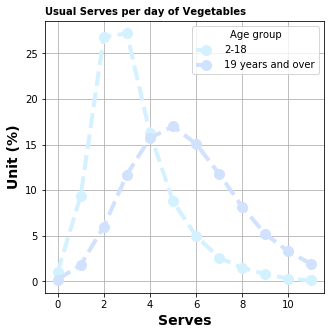

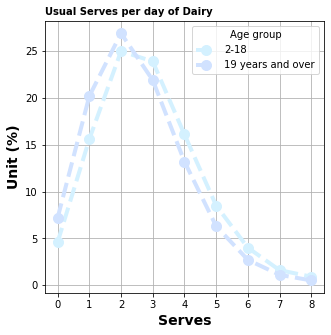

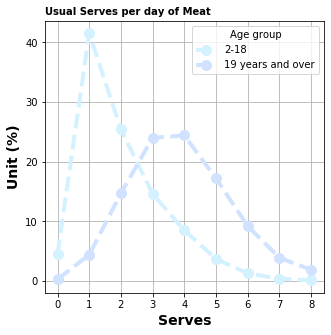

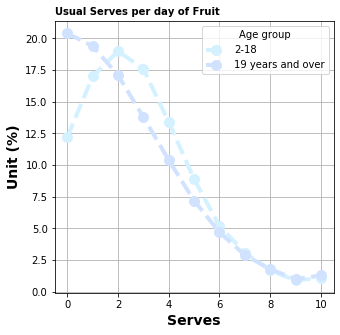

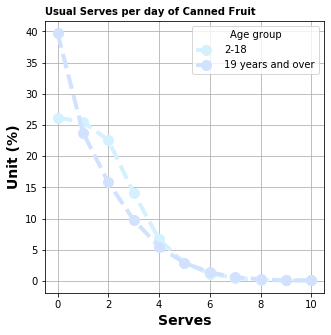

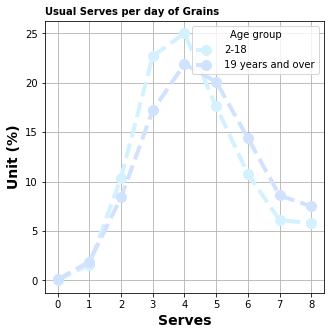

In [137]:
#MALES 
M_Vegetables.plot(color={"#D4F1FF", "#D1E2FF"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Vegetables', fontsize=10, loc='left', weight='bold')
plt.xlabel('Serves', fontsize=14, weight='bold')
plt.ylabel('Unit (%)', fontsize=14, weight='bold')
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

M_Dairy.plot(color={"#D4F1FF", "#D1E2FF"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Dairy', fontsize=10, loc='left', weight='bold')
plt.xlabel('Serves', fontsize=14, weight="bold")
plt.ylabel('Unit (%)', fontsize=14, weight="bold")
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

M_Meat.plot(color={"#D4F1FF", "#D1E2FF"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Meat', fontsize=10, loc='left', weight="bold")
plt.xlabel('Serves', fontsize=14, weight="bold")
plt.ylabel('Unit (%)', fontsize=14, weight="bold")
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

M_FruitServings.plot(color={"#D4F1FF", "#D1E2FF"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Fruit', fontsize=10, loc='left', weight="bold")
plt.xlabel('Serves', fontsize=14, weight="bold")
plt.ylabel('Unit (%)', fontsize=14, weight="bold")
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

M_CannedFruitsServings.plot(color={"#D4F1FF", "#D1E2FF"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Canned Fruit', fontsize=10, loc='left', weight="bold")
plt.xlabel('Serves', fontsize=14, weight="bold")
plt.ylabel('Unit (%)', fontsize=14, weight="bold")
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

M_Grains.plot(color={"#D4F1FF", "#D1E2FF"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Grains', fontsize=10, loc='left', weight="bold")
plt.xlabel('Serves', fontsize=14, weight="bold")
plt.ylabel('Unit (%)', fontsize=14, weight="bold")
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

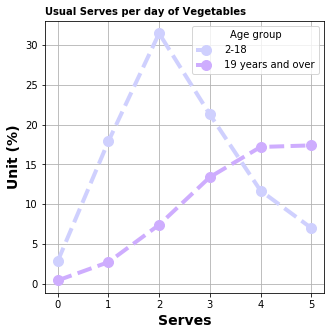

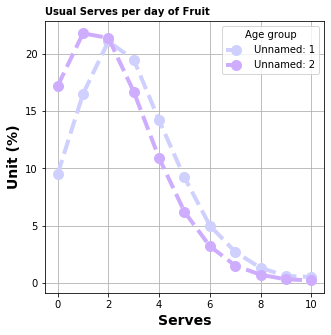

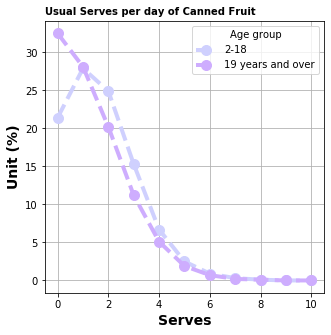

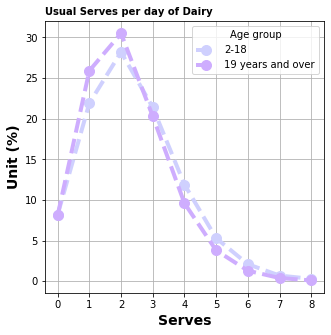

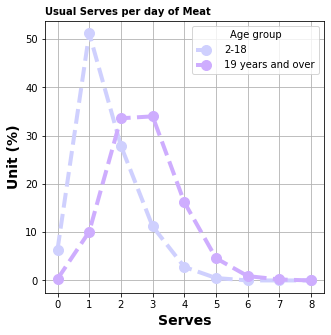

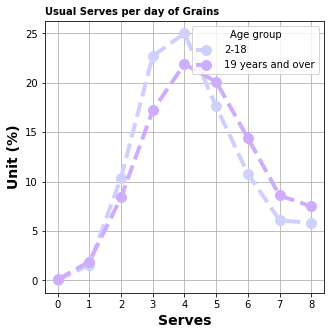

In [69]:
#FEMALES
F_Vegetables.plot(color={"#CEADFE", "#CFD0FE"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Vegetables', fontsize=10, loc='left', weight='bold')
plt.xlabel('Serves', fontsize=14, weight='bold')
plt.ylabel('Unit (%)', fontsize=14, weight='bold')
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

F_Fruit.plot(color={"#CEADFE", "#CFD0FE"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Fruit', fontsize=10, loc='left', weight='bold')
plt.xlabel('Serves', fontsize=14, weight='bold')
plt.ylabel('Unit (%)', fontsize=14, weight='bold')
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

F_Canned.plot(color={"#CEADFE", "#CFD0FE"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Canned Fruit', fontsize=10, loc='left', weight='bold')
plt.xlabel('Serves', fontsize=14, weight='bold')
plt.ylabel('Unit (%)', fontsize=14, weight='bold')
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

F_Dairy.plot(color={"#CEADFE", "#CFD0FE"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Dairy', fontsize=10, loc='left', weight='bold')
plt.xlabel('Serves', fontsize=14, weight='bold')
plt.ylabel('Unit (%)', fontsize=14, weight='bold')
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

F_Meat.plot(color={"#CEADFE", "#CFD0FE"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Meat', fontsize=10, loc='left', weight='bold')
plt.xlabel('Serves', fontsize=14, weight='bold')
plt.ylabel('Unit (%)', fontsize=14, weight='bold')
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

F_Grains.plot(color={"#CEADFE", "#CFD0FE"}, marker='o', markersize=10, linestyle='dashed', linewidth=4, figsize=(5, 5))
plt.title('Usual Serves per day of Grains', fontsize=10, loc='left', weight='bold')
plt.xlabel('Serves', fontsize=14, weight='bold')
plt.ylabel('Unit (%)', fontsize=14, weight='bold')
plt.legend(loc='upper right', title="Age group")
plt.grid(True)

## What do the servings tell us?
- Vegetables, legumes and beans: On average those aged 19 and above, so adults, consume at least 3 servings a day. For those ages 2-18 1.8 servings a day.

- Fruit + Canned Fruits: On average those aged 19 and above, so adults, consume around 1.7 servings a day. For those ages 2-18 1.8 servings a day.

- Dairy (Milk, yoghurt, cheese and alternatives group): On average both age groups consume around 1.5 servings a day. Why is it similar?

- Meat (Poultry, fish, eggs, tofu, nuts and seeds and legumes/ beans): On average both age groups consume around 1.5 servings a day. Why is it similar?

- Grains (Cereals): On average both age groups around 4.5 servings a day.

## Water Consumption

In [24]:
loadwater = water.head(12)
water_columns = loadwater.drop(columns="Age group (years)", axis=0)
water_rename = water_columns.rename(columns={"Unnamed: 0": "Percentiles", "Unnamed: 2": "2-3", "Unnamed: 3": "4-8", "Unnamed: 5": "12-13", "Unnamed: 6": "14-18", "Unnamed: 7": "19-50", "Unnamed: 8": "51-70", "Unnamed: 9": "71 years and over", "Unnamed: 4": "9-11"})
Water_Consumption = water_rename.drop(index={0, 1, 2})
Water_Consumption

,Percentiles,2-3,4-8,9-11,12-13,14-18,19-50,51-70,71 years and over
3,5,162.9,274.9,189.2,169,134,180.3,46.7,28
4,10,230.2,357.1,300.1,278.8,281.3,356.9,119.2,76.4
5,15,279.9,419.7,385.7,368.6,408.5,495.3,199.2,135.2
6,25,362.4,517.8,534.3,515.1,601.4,720.3,366.3,257
7,50,535.2,723.9,863,844.9,1028.3,1193.6,757.4,564.5
8,75,743.2,961.4,1287.7,1275.8,1550.7,1760.6,1220.8,947.4
9,85,866.6,1108.9,1570.3,1551.7,1879.8,2112.4,1505,1192.8
10,90,953.4,1214.9,1771,1747.3,2119.5,2370.6,1726.2,1379.9
11,95,1110.8,1382.1,2126.2,2086.2,2516.1,2797,2070.7,1688.8


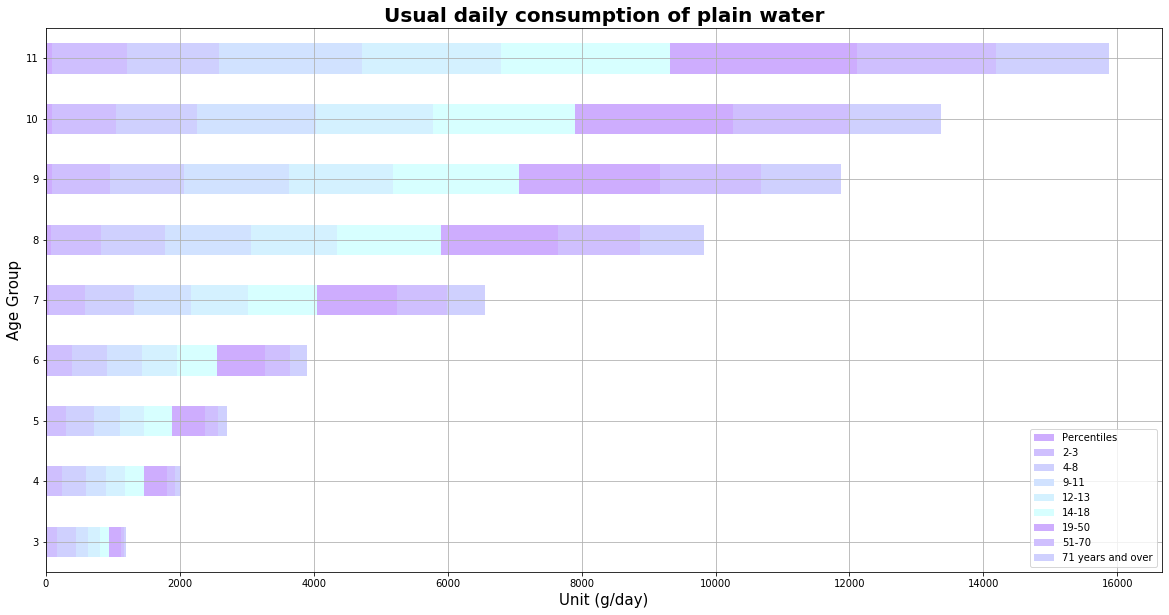

In [26]:
Water_Consumption.plot(kind='barh', stacked=True, color=['#CEADFE', "#CFBFFE", "#CFD0FE", "#D1E2FF", "#D4F1FF", "#D7FFFF"])
plt.xlabel("Unit (g/day)", fontsize=15)
plt.ylabel("Age Group", fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Usual daily consumption of plain water', fontsize=20, weight="bold")
plt.grid(True)

In [526]:
#FEMALES
fem = water.head(31)
das = fem.drop(columns="Age group (years)", axis=0)
sd = das.rename(columns={"Unnamed: 0": "Percentiles", "Unnamed: 2": "2-3", "Unnamed: 3": "4-8", "Unnamed: 5": "12-13", "Unnamed: 6": "14-18", "Unnamed: 7": "19-50", "Unnamed: 8": "51-70", "Unnamed: 9": "71 years and over", "Unnamed: 4": "9-11"})
cs = sd.drop(index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 26, 27, 28, 29, 30})

cs

,Percentiles,2-3,4-8,9-11,12-13,14-18,19-50,51-70,71 years and over
17,5,128,252.9,193.9,190.1,221.7,240.6,177.4,89
18,10,208,343.6,298.4,312.3,364.6,399.7,315.1,175.4
19,15,260,405.5,377.8,405.6,477.8,519.2,421.4,251.5
20,25,345.4,505.3,512.5,555,654,710.9,595.5,383.3
21,50,521.2,710.7,816.8,885.2,1018.3,1113.4,966.6,678.5
22,75,727,947.8,1195.7,1288.4,1455.5,1588,1408.3,1038.8
23,85,853.8,1092.9,1421.8,1541.1,1741,1880,1676.1,1261.3
24,90,948.2,1203,1601.8,1730.6,1941.3,2096.3,1877.2,1430
25,95,1092.1,1370.3,1899.2,2038.5,2282.1,2439.5,2191,1699.3


In [537]:
display(cs, Water_Consumption)

,Percentiles,2-3,4-8,9-11,12-13,14-18,19-50,51-70,71 years and over
17,5,128,252.9,193.9,190.1,221.7,240.6,177.4,89
18,10,208,343.6,298.4,312.3,364.6,399.7,315.1,175.4
19,15,260,405.5,377.8,405.6,477.8,519.2,421.4,251.5
20,25,345.4,505.3,512.5,555,654,710.9,595.5,383.3
21,50,521.2,710.7,816.8,885.2,1018.3,1113.4,966.6,678.5
22,75,727,947.8,1195.7,1288.4,1455.5,1588,1408.3,1038.8
23,85,853.8,1092.9,1421.8,1541.1,1741,1880,1676.1,1261.3
24,90,948.2,1203,1601.8,1730.6,1941.3,2096.3,1877.2,1430
25,95,1092.1,1370.3,1899.2,2038.5,2282.1,2439.5,2191,1699.3


,Percentiles,2-3,4-8,9-11,12-13,14-18,19-50,51-70,71 years and over
3,5,162.9,274.9,189.2,169,134,180.3,46.7,28
4,10,230.2,357.1,300.1,278.8,281.3,356.9,119.2,76.4
5,15,279.9,419.7,385.7,368.6,408.5,495.3,199.2,135.2
6,25,362.4,517.8,534.3,515.1,601.4,720.3,366.3,257
7,50,535.2,723.9,863,844.9,1028.3,1193.6,757.4,564.5
8,75,743.2,961.4,1287.7,1275.8,1550.7,1760.6,1220.8,947.4
9,85,866.6,1108.9,1570.3,1551.7,1879.8,2112.4,1505,1192.8
10,90,953.4,1214.9,1771,1747.3,2119.5,2370.6,1726.2,1379.9
11,95,1110.8,1382.1,2126.2,2086.2,2516.1,2797,2070.7,1688.8


## Do we drink enough water? 
- Consuming plain water, either tap or bottled..
- 50% of the population of Australians consumed plain water 

## Are we being active?
After looking at the daily consumption of food, we shall look at another thing that contributes to our health, our physical activity. 

The columns for Walking for transport, Walking for fitness, recreation or sport, Moderate, Vigorous, Vigorous gardening, Strength or toning. - All different types of exercises that are mostly done by Australians. 



In [61]:
physical = Average_PhysicalActivity.head(13)
phys = physical.drop([0, 1, 2, 3, 4, 5], axis=0)
new_phys = phys.rename(columns={"Unnamed: 0": "Age group (years)"}, index={6: "18-24", 7: "25-34", 8: "35-34", 9: "45-54", 10: "55-64", 11: "65-74", 12: "75 and over"})
Average_Physical = new_phys.drop(columns=["Unnamed: 6"])

Average_Physical

,Age group (years),Walking for transport,"Walking for fitness, recreation or sport",Moderate,Vigorous,Total(c),Vigorous gardening,Strength or toning
18-24,18–24,94.0,40.0,29.0,114.0,276.0,27,48.0
25-34,25–34,93.0,47.0,22.0,75.0,236.0,36,34.0
35-34,35–44,84.0,58.0,19.0,59.0,219.0,59,28.0
45-54,45–54,82.0,75.0,23.0,60.0,239.0,67,21.0
55-64,55–64,83.0,75.0,37.0,32.0,226.0,79,17.0
65-74,65–74,73.0,80.0,41.0,21.0,214.0,87,22.0
75 and over,75 and over,53.0,56.0,25.0,7.0,142.0,63,9.0


In [69]:
genders_physical = Average_PhysicalActivity.head(4)
gen = genders_physical.drop([0, 1], axis=0)
rename = gen.rename(columns={"Unnamed: 0": "Gender"}, index={2: "Male", 3: "Female"})
New_PhysicalActivity = rename.drop(columns=["Unnamed: 6", "Total(c)"])

New_PhysicalActivity

,Gender,Walking for transport,"Walking for fitness, recreation or sport",Moderate,Vigorous,Vigorous gardening,Strength or toning
Male,Male,88.0,57.0,32.0,74.0,77,35.0
Female,Female,79.0,65.0,22.0,41.0,39,19.0


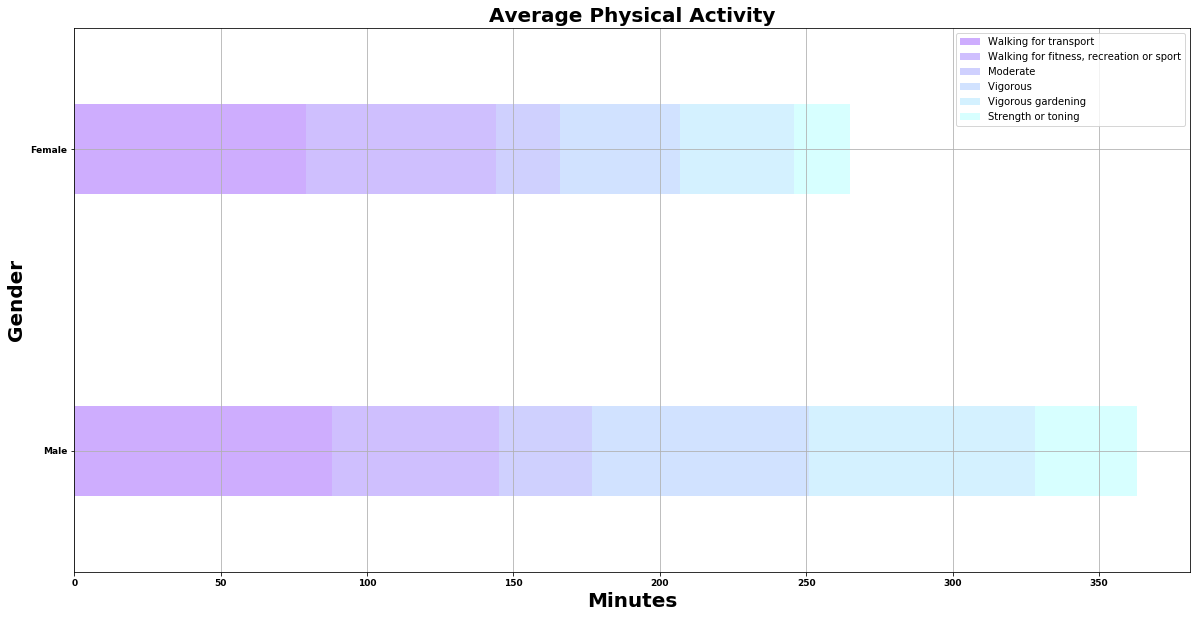

In [113]:
New_PhysicalActivity.plot(kind='barh', stacked=True, width=0.3, color=["#CEADFE", "#CFBFFE", "#CFD0FE", "#D1E2FF", "#D4F1FF", "#D7FFFF"])
plt.xlabel("Minutes", fontsize=20, weight="bold")
plt.ylabel("Gender", fontsize=20, weight="bold")
plt.yticks(fontsize=9, weight="bold")
plt.xticks(fontsize=9, weight="bold")
plt.title('Average Physical Activity', fontsize=20, weight="bold")
plt.grid(True)

## Physical Activity 
- As seen from the stack bar charts, it is seen that we do take physical activities seriously.
- Activities such as walking for transport or for fitness we can see a big chunk of it. Since we're really big on transport, most Australian's travel to work through transport - hence we walk more. 

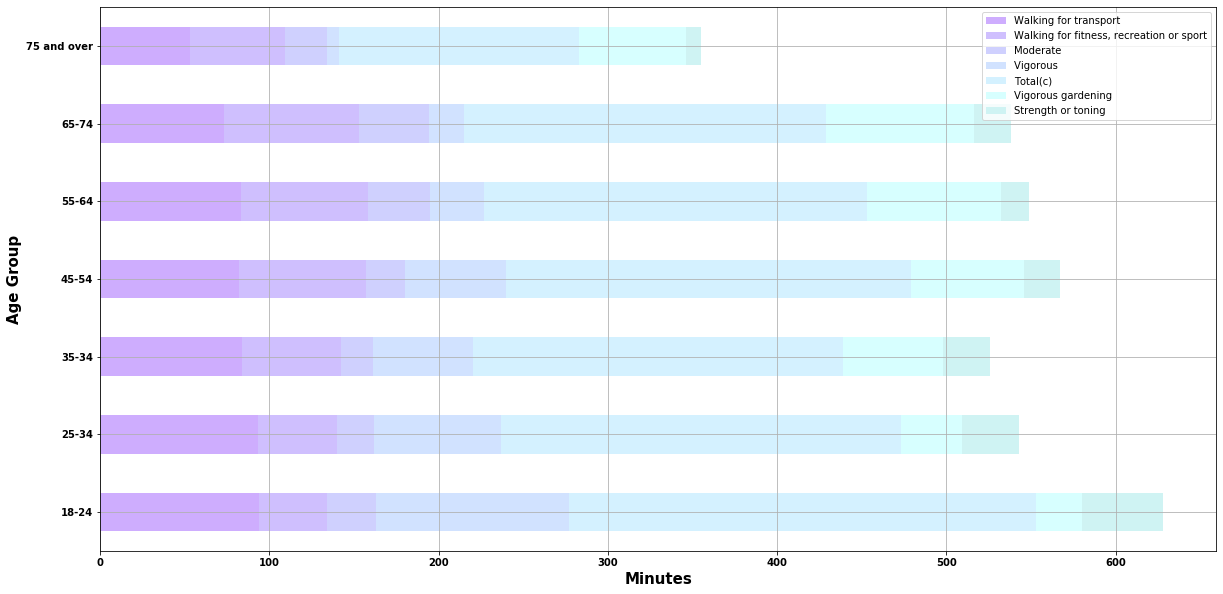

In [144]:
Average_Physical.plot(kind='barh', stacked=True, figsize=(20, 10), color=["#CEADFE", "#CFBFFE", "#CFD0FE", "#D1E2FF", "#D4F1FF", "#D7FFFF", "#CFF3F3"])
plt.xlabel("Minutes", fontsize=15, weight="bold")
plt.ylabel("Age Group", fontsize=15, weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.xticks(fontsize=10, weight="bold")
plt.grid(True)

# Conclusion
Are Australians meeting the guidelines?
- These datasets are critical to seek the emerging issues in public health, in terms of what we eat and our health behaviours. 
- At the moment there is no regular food and nutrition monitoring systems in Australia - the data for public consumption is currently dependent on public surveys 
- Since this is a more of a summary data set. 
- By looking at the data manipulations and data visualisations I have manipulated, we were able to seek a comprehensive food and nutrition monitoring. 